> # **Bagging and Boosting**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the diamonds dataset
diamonds_df = sns.load_dataset('diamonds')

# Split the data into training and testing sets
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price']

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

X_train, X_test, y_train, y_test = train_test_split(X, diamonds_df['price'], random_state=42)

# Train and evaluate the models
ada = AdaBoostRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
models = {'Adaboost': ada, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}')


Adaboost - MSE: 1858993.95
Random Forest - MSE: 293905.70
XGBoost - MSE: 302468.09


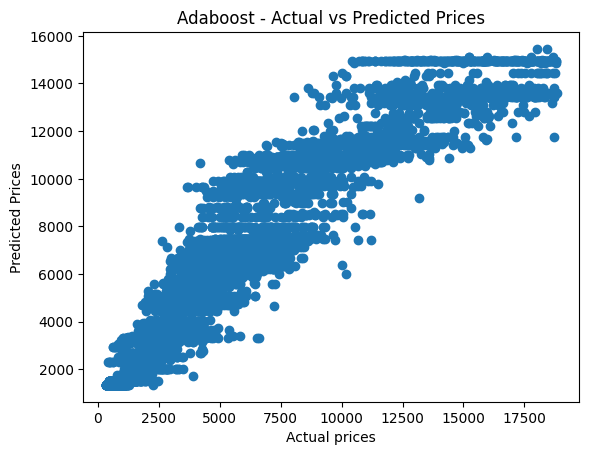

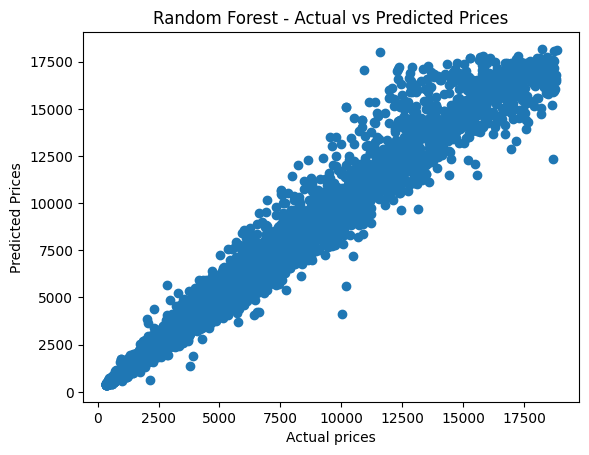

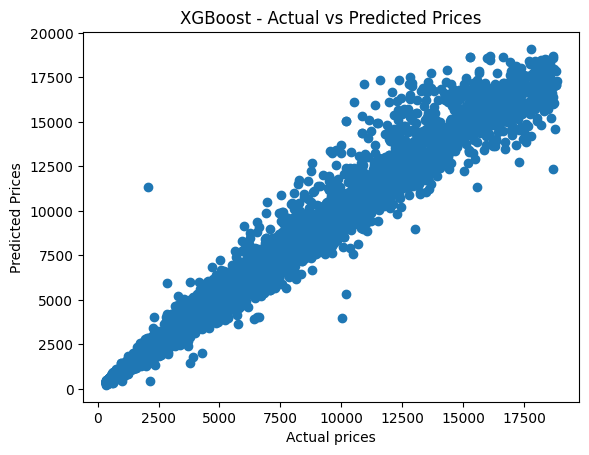

In [4]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name} - Actual vs Predicted Prices')
    plt.show()

In [8]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [7]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [9]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## XGboost vs Random Forest 
### With Hyperparameter Tuning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the diamonds dataset
diamonds_df = sns.load_dataset('diamonds')

# Split the data into training and testing sets
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price']

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

X_train, X_test, y_train, y_test = train_test_split(X, diamonds_df['price'], random_state=42)


# Define the models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
# Hyper parameters of these models
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
xgb_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}


# Perform grid search to find the best hyperparameters for each model
rf_gs = GridSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

xgb_gs = GridSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=5)
xgb_gs.fit(X_train, y_train)
xgb_best = xgb_gs.best_estimator_

# Evaluate the best models on the test data
rf_pred = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest - MSE: {rf_mse:.2f}')

xgb_pred = xgb_best.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost - MSE: {xgb_mse:.2f}')